Here, in this notebook, we develop the SNR features of the primary KOIS

In [14]:
import numpy as np
import pandas as pd
import os
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
import time
from scipy.optimize import brute

In [15]:
'''
file_name = "../nhussain_scripts/InvModShiftVals/10129857-10_feats.txt"
file_list = os.listdir("../KOI_ModShiftVals_Try2//.")
file_list = [x for x in file_list if "fixed" in x]
print len(file_list)
star_list = [x.split("_")[0] for x in file_list]
file_catalog = np.loadtxt("../../../Training/simulation/primaryKOI_try2/prim_ltf.txt", dtype=str)
file_list=[x.split("_")[0]+"_prim_feats_fixed.txt" for x in file_catalog]
print file_list[0], len(file_list)
print len(np.unique(star_list))
unique_star_list = np.unique([x.split("-")[0] for x in star_list])
print len(unique_star_list)

#created a new text file with the removed 6 stars so that it doesnt mess up the data generation script. 
#This file is called prim_ltf_txt_trimmed

koi_3149_list = [x.split("-")[0] for x in file_catalog]
unique_koi_list = np.unique(koi_3149_list)
print len(koi_3149_list)
print len(star_list), len(koi_3149_list), len(unique_star_list), len(unique_koi_list)
for name in unique_koi_list:
    if name not in unique_star_list:
        print name
        
'''
file_list = np.loadtxt("../Catalogs/prim_ltf_trimmed.txt", dtype = str)
print file_list.shape
star_list = [x.split("_")[0] for x in file_list]
print star_list

(3080,)
['10000941-0', '10000941-10', '10000941-11', '10000941-12', '10000941-13', '10000941-14', '10000941-15', '10000941-1', '10000941-2', '10000941-3', '10000941-4', '10000941-5', '10000941-6', '10000941-7', '10000941-8', '10000941-9', '10024701-0', '10024701-1', '10024701-2', '10024701-3', '10024701-4', '10024701-5', '10024701-6', '10024701-7', '10024701-8', '10024701-9', '10053138-0', '10053138-1', '10053138-2', '10053138-3', '10053138-4', '10053138-5', '10053138-6', '10063208-0', '10063208-1', '10063208-2', '10063208-3', '10063208-4', '10063208-5', '10063208-6', '10063208-7', '10063208-8', '10063208-9', '10130039-0', '10130039-10', '10130039-11', '10130039-1', '10130039-2', '10130039-3', '10130039-4', '10130039-5', '10130039-6', '10130039-7', '10130039-8', '10130039-9', '10154388-0', '10154388-10', '10154388-11', '10154388-1', '10154388-2', '10154388-3', '10154388-4', '10154388-5', '10154388-6', '10154388-7', '10154388-8', '10154388-9', '10155029-0', '10155029-1', '10155029-2', '

In [3]:
#print star_list[1
data_table = pd.read_csv("../Data/KOI_feat_files_3080_fixed_ordered_try2.csv", index_col = 0)
data_table.head()

,mod_sig_pri_dv,mod_sig_sec_dv,mod_sig_ter_dv,mod_sig_pos_dv,mod_fa1_dv,mod_fa2_dv,mod_fred_dv,modshiftval1_dv,modshiftval2_dv,modshiftval3_dv,...,BLS_i2_1_0,BLS_deltaChi2_1_0,BLS_fraconenight_1_0,BLS_Npointsintransit_1_0,BLS_Ntransits_1_0,BLS_Npointsbeforetransit_1_0,BLS_Npointsaftertransit_1_0,BLS_Rednoise_1_0,BLS_Whitenoise_1_0,BLS_SignaltoPinknoise_1_0
0,0.00010,-9.993175,0.006914,-0.000487,2.890723,1.683670,1.005397,-2.890624,-1.690483,-1.683083,...,0.96101,-0.0,0.14202,133.0,24.0,148.0,134.0,0.00004,0.00017,5.83681
1,0.00018,-9.982177,0.017533,-0.014838,3.338459,3.020050,0.252293,-3.337746,-3.037403,-3.005032,...,0.05055,-0.0,0.88621,51.0,3.0,47.0,50.0,0.00001,0.00018,6.80030
2,0.00015,-9.989170,0.009608,-0.008737,3.180644,2.974051,0.464413,-3.180321,-2.983509,-2.965164,...,0.97089,-0.0,0.43709,48.0,2.0,53.0,54.0,0.00000,0.00015,7.04246
3,0.00010,-9.996074,0.002071,-0.019393,2.881972,2.019152,0.993675,-2.881872,-2.021124,-1.999660,...,0.43575,-0.0,0.14349,140.0,11.0,147.0,140.0,0.00003,0.00016,6.21358
4,0.00025,-9.976817,0.021595,-0.020386,3.253059,3.050659,0.153960,-3.251435,-3.072004,-3.030023,...,0.97488,-0.0,0.80420,35.0,2.0,38.0,41.0,0.00002,0.00020,6.96992


In [4]:
#file_list = os.listdir("../../Training/simulation/primaryKOI_try2/")
#generate the feature files from the 
#dont need to run this cell with the feature file generated.
'''
print len(file_list)
data_table = np.zeros((len(file_list), 35))
for i, name in enumerate(star_list):
    try:
        data = np.loadtxt("../KOI_ModShiftVals_Try2/"+name+"_prim_feats_fixed.txt")
        data_table[i, :] = data
    except:
        print name+"_prim_feats_fixed.txt"
'''

'\nprint len(file_list)\ndata_table = np.zeros((len(file_list), 35))\nfor i, name in enumerate(star_list):\n    try:\n        data = np.loadtxt("../KOI_ModShiftVals_Try2/"+name+"_prim_feats_fixed.txt")\n        data_table[i, :] = data\n    except:\n        print name+"_prim_feats_fixed.txt"\n'

In [16]:
#loaf the primary KOI table to determine the correct period of the kois in our dataset

file_name = '../../../Training/catalogs/shortperiodbright_KOI.csv'
koi = pd.read_csv(file_name)
#print koi.columns.values
print len(np.unique(koi["kepid"])),  koi.shape
star_name = koi["kepid"]
koi.head(5)

284 (392, 50)


,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,4966,10000941,K04146.01,Kepler-1558 b,CONFIRMED,CANDIDATE,0.999,0,0,0,...,-139.0,4.477,0.095,-0.105,0.854,0.103,-0.093,286.81937,46.911690,13.632
1,4967,10000941,K04146.02,NaN,CANDIDATE,CANDIDATE,1.000,0,0,0,...,-139.0,4.477,0.095,-0.105,0.854,0.103,-0.093,286.81937,46.911690,13.632
2,2605,10024701,K02002.01,Kepler-1046 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-130.0,4.403,0.076,-0.114,1.053,0.168,-0.104,296.75574,46.998291,13.286
3,7125,10053138,K07279.01,NaN,CANDIDATE,CANDIDATE,0.769,0,0,0,...,-72.0,4.333,0.154,-0.126,1.056,0.191,-0.173,280.71948,47.072220,13.717
4,5105,10063208,K04292.01,Kepler-1583 b,CONFIRMED,CANDIDATE,0.995,0,0,0,...,-82.0,4.514,0.032,-0.128,0.888,0.138,-0.046,286.38693,47.016628,12.897


In [6]:
#star_ids = koi["kepid"].values.tolist()
#star_planet_count = np.zeros(392)
#for i, star_id in enumerate(star_ids):
#    star_planet_count[i] = star_ids.count(star_id)
#print len(np.where(star_planet_count==1)[0])

In [7]:
'''
star_name = koi["kepid"]
periods = koi["koi_period"]
inds = np.where(koi["koi_model_snr"]==np.nan)[0]
koi["koi_model_snr"][inds]==1000.


SNR = np.zeros(len(star_list))
periods = np.zeros_like(SNR)
star_name_id = np.zeros_like(SNR)
star_segment = np.zeros_like(SNR)


#print data.shape
start  = time.time()
# create KOI lc file with p rad, s rad,period,  duration
for i, val in enumerate(star_list):
    name = int(val.split("-")[0])
    file_name = val#(val.split("-")[0]) + "-"+(val.split("-")[1]).split("_")[0]
   
    if name in star_name.tolist():
        lc_data = np.loadtxt("../../../Training/simulation/primaryKOI_try2//"+file_name+"_prim_ltf.lc")    
        location = np.where(star_name== int(name))[0]
        #planet_num = 0
        if len(location) > 1:
            #This is done to find the planet with the highest SNR for that star
            #this planets period and depth is used when calculating the SNR for the lightcurve
            planet_num = np.where(koi["koi_model_snr"][location].max() == koi["koi_model_snr"][location])[0]
            location =   np.where(star_name== int(name))[0][planet_num]
        else:
            location = np.where(star_name== int(name))[0][0]
        
        try:
            #the factor of dividing it by 110 is becuase prad is given in Earth Radii
            depth = ((koi["koi_prad"][location]/ koi["koi_srad"][location])/float(110))**2      
            period = koi["koi_period"][location] #days
            periods[i] = period
            duration = koi["koi_duration"][location] #hours
            model_snr = koi["koi_model_snr"][location]
            n_points = np.floor(duration * 2) # assuming duration is given in hours, as days does not make sense
            meidan = np.median(lc_data[:,2]) # flux
            error = np.median(np.abs(lc_data[:,2]-meidan)**2)**0.5
            n_transits = float(26)//float(period) +1
           
            SNR[i] = depth*np.sqrt(n_transits) * np.sqrt(n_points)/(error*np.sqrt(2))
            star_name_id[i] = val.split("-")[0]
            star_segment[i] = (val.split("-")[1]).split("_")[0]
           
        except:
            continue       
       
    else:
        print "Not in list", val[:-17]#+"ltf.lc"
    if i %1000 ==999:
        print i

'''

'\nstar_name = koi["kepid"]\nperiods = koi["koi_period"]\ninds = np.where(koi["koi_model_snr"]==np.nan)[0]\nkoi["koi_model_snr"][inds]==1000.\n\n\nSNR = np.zeros(len(star_list))\nperiods = np.zeros_like(SNR)\nstar_name_id = np.zeros_like(SNR)\nstar_segment = np.zeros_like(SNR)\n\n\n#print data.shape\nstart  = time.time()\n# create KOI lc file with p rad, s rad,period,  duration\nfor i, val in enumerate(star_list):\n    name = int(val.split("-")[0])\n    file_name = val#(val.split("-")[0]) + "-"+(val.split("-")[1]).split("_")[0]\n   \n    if name in star_name.tolist():\n        lc_data = np.loadtxt("../../../Training/simulation/primaryKOI_try2//"+file_name+"_prim_ltf.lc")    \n        location = np.where(star_name== int(name))[0]\n        #planet_num = 0\n        if len(location) > 1:\n            #This is done to find the planet with the highest SNR for that star\n            #this planets period and depth is used when calculating the SNR for the lightcurve\n            planet_num = np

In [8]:
'''
size = SNR.shape[0]
SNR_feats = np.hstack([star_name_id.reshape(size, 1), star_segment.reshape(size,1), SNR.reshape(size, 1)])
np.savetxt("../Data/SNR_feats_KOIS_3080_fixed_try2.txt", SNR_feats)
print SNR_feats.shape
np.savetxt("../Data/koi_periods_try2.txt", periods)

col_names = ["mod_sig_pri_dv", "mod_sig_sec_dv","mod_sig_ter_dv",
             "mod_sig_pos_dv", "mod_fa1_dv","mod_fa2_dv", "mod_fred_dv",
             "modshiftval1_dv", "modshiftval2_dv", "modshiftval3_dv",
             "modshiftval4_dv", "modshiftval5_dv", "modshiftval6_dv", 
             "white_noise", "red_noise", "BLS_Period_1_0", "BLS_Tc_1_0",
             "BLS_SN_1_0", "BLS_SR_1_0", "BLS_SDE_1_0", "BLS_Depth_1_0",
             "BLS_Qtran_1_0", "BLS_Qingress_1_0", "BLS_OOTmag_1_0",
             "BLS_i1_1_0", "BLS_i2_1_0", "BLS_deltaChi2_1_0", 
             "BLS_fraconenight_1_0", "BLS_Npointsintransit_1_0",
             "BLS_Ntransits_1_0", "BLS_Npointsbeforetransit_1_0", 
             "BLS_Npointsaftertransit_1_0", "BLS_Rednoise_1_0",
             "BLS_Whitenoise_1_0", "BLS_SignaltoPinknoise_1_0"]
data_table = pd.DataFrame(data_table,columns=col_names )
data_table.to_csv("../Data/KOI_feat_files_3080_fixed_ordered_try2.csv")
'''

'\nsize = SNR.shape[0]\nSNR_feats = np.hstack([star_name_id.reshape(size, 1), star_segment.reshape(size,1), SNR.reshape(size, 1)])\nnp.savetxt("../Data/SNR_feats_KOIS_3080_fixed_try2.txt", SNR_feats)\nprint SNR_feats.shape\nnp.savetxt("../Data/koi_periods_try2.txt", periods)\n\ncol_names = ["mod_sig_pri_dv", "mod_sig_sec_dv","mod_sig_ter_dv",\n             "mod_sig_pos_dv", "mod_fa1_dv","mod_fa2_dv", "mod_fred_dv",\n             "modshiftval1_dv", "modshiftval2_dv", "modshiftval3_dv",\n             "modshiftval4_dv", "modshiftval5_dv", "modshiftval6_dv", \n             "white_noise", "red_noise", "BLS_Period_1_0", "BLS_Tc_1_0",\n             "BLS_SN_1_0", "BLS_SR_1_0", "BLS_SDE_1_0", "BLS_Depth_1_0",\n             "BLS_Qtran_1_0", "BLS_Qingress_1_0", "BLS_OOTmag_1_0",\n             "BLS_i1_1_0", "BLS_i2_1_0", "BLS_deltaChi2_1_0", \n             "BLS_fraconenight_1_0", "BLS_Npointsintransit_1_0",\n             "BLS_Ntransits_1_0", "BLS_Npointsbeforetransit_1_0", \n             "BLS_Npoi

In [17]:
#This is the same file you just generated
koi_info = np.loadtxt("../Data/SNR_feats_KOIS_3080_fixed_try2.txt")

Here, you are generating the period error for the primary koi

In [10]:
planet_periods = np.zeros(data_table.shape[0])
start  = time.time()

# create KOI lc file with p rad, s rad,period,  duration
# select the planet with the largest signal for each star in the KOI list
for i, val in enumerate(star_list):
    name = int(val.split("-")[0])
    if name in star_name.tolist():
        location = np.where(star_name== name)[0]
        if len(location) > 1:
            planet_num = np.where(koi["koi_model_snr"][location].max() == koi["koi_model_snr"][location])[0]
            location =   np.where(star_name== int(name))[0][planet_num]
        else:
            location = np.where(star_name== int(name))[0][0]
        try:
            planet_periods[i] = koi["koi_period"][location] #days
            print planet_periods[i]
          
        except:
            print name
        
    else:
        print "Not in list", name#+"ltf.lc"
    if i %1000 ==999:
        print i
   


3.50472344
3.50472344
3.50472344
3.50472344
3.50472344
3.50472344
3.50472344
3.50472344
3.50472344
3.50472344
3.50472344
3.50472344
3.50472344
3.50472344
3.50472344
3.50472344
14.37504582
14.37504582
14.37504582
14.37504582
14.37504582
14.37504582
14.37504582
14.37504582
14.37504582
14.37504582
11.7728146
11.7728146
11.7728146
11.7728146
11.7728146
11.7728146
11.7728146
9.3281912
9.3281912
9.3281912
9.3281912
9.3281912
9.3281912
9.3281912
9.3281912
9.3281912
9.3281912
12.75800092
12.75800092
12.75800092
12.75800092
12.75800092
12.75800092
12.75800092
12.75800092
12.75800092
12.75800092
12.75800092
12.75800092
12.06222962
12.06222962
12.06222962
12.06222962
12.06222962
12.06222962
12.06222962
12.06222962
12.06222962
12.06222962
12.06222962
12.06222962
2.131660527
2.131660527
2.131660527
2.131660527
2.131660527
2.131660527
2.131660527
2.131660527
5.007414194
5.007414194
5.007414194
5.007414194
5.007414194
5.007414194
5.007414194
5.007414194
5.007414194
5.007414194
5.007414194
5.007414194

In [11]:
#period error function
def period_func(vals, p_bls, p_inj):
    a, b = vals
    a = np.rint(a)
    b = np.rint(b)   
    return np.abs((a*p_bls - b*p_inj) / 0.5/(a*p_bls + b*p_inj))

In [12]:
rranges=(slice(1, 6, 1), slice(1, 6, 1))
harmonics_koi = np.empty(shape = [data_table.shape[0],2])
for i in range(data_table.shape[0]):
    results = brute(period_func, ranges=rranges, args=(data_table["BLS_Period_1_0"][i], planet_periods[i]), full_output=True, finish= None)
    #print results[0]
    harmonics_koi[i, :] =results[0]
    try:
        results[0].astype(int)
    except:
        print i
    #break
print harmonics_koi.shape

(3080, 2)


3080 (3080,) (3080, 2)
685
2588
(3080, 2) (3080,)


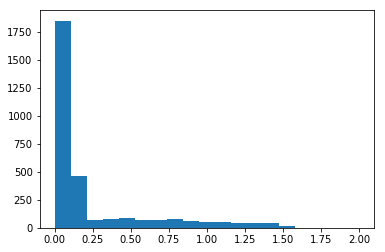

In [13]:
tol_koi = np.zeros(data_table.shape[0])
print data_table.shape[0], planet_periods.shape, harmonics_koi.shape

for i in range(data_table.shape[0]):
    a = harmonics_koi[i]
    b = data_table["BLS_Period_1_0"][i]
    c = planet_periods[i]
    tol_koi[i] = period_func( harmonics_koi[i], data_table["BLS_Period_1_0"][i], planet_periods[i])
print len(np.where(tol_koi<0.002)[0])
print len(np.unique(np.where(harmonics_koi>1)[0]))
plt.hist(tol_koi, bins = np.linspace(0,2,20))
print harmonics_koi.shape, tol_koi.shape
#Here is the error distribution of the primary KOI
tot_vals_koi = np.hstack([harmonics_koi, tol_koi.reshape(harmonics_koi.shape[0], 1)]) 

In [39]:
#np.savetxt("../Data/period_harmonics_3080_koi_signals_tol_5x5_ordered_try2.txt", tot_vals_koi)